In [1]:
!pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.6.2-py3-none-any.whl size=10736 sha256=e92e84ac2023c446eef3889d1db3f60d191d748001b80c9de9902e98cadaba37
  Stored in directory: /root/.cache/pip/wheels/34/22/5f/9ba9db604d08670e283b2e04551dd407f44cf889fdb9617ce5
Successfully built empiricaldist


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from empiricaldist import Pmf, Cdf
import plotly.express as px

# **Intermediate Statistic**
1. Probability:
  - PMF
  - CDF
2. Distribution and Skewness
3. Correlation
5. Statistical Analysis:
  - Scatter Plot
  - Histogram
  - Boxplot
6. Handling outlier data using IQR


In [3]:
loan_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv')
loan_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


#**Probability**

In [4]:
loan_data['Gender'].value_counts(normalize=True)

Male      0.817048
Female    0.182952
Name: Gender, dtype: float64

In [5]:
Pmf.from_seq(loan_data['Gender'], normalize=True)

,probs
Female,0.182952
Male,0.817048


In [6]:
Pmf.from_seq(loan_data['Education'], normalize=True)

,probs
Graduate,0.790224
Not Graduate,0.209776


In [7]:
CDF_error = Pmf.from_seq(loan_data['LoanAmount'], normalize=True)
CDF_error = pd.DataFrame({'LoanAmount':CDF_error.index, 'PMF':CDF_error.values})
px.bar(CDF_error, x='LoanAmount',y='PMF',width=750,height=550)
#kalo mau divisualisasi harus diubah menjadi dataframe dulu

In [8]:
CDF_true = Cdf.from_seq(loan_data['LoanAmount'])
CDF_true = pd.DataFrame({'LoanAmount':CDF_true.index, "CDF":CDF_true.values})

# visulization
px.line(CDF_true, x='LoanAmount', y='CDF', width=750, height=550)


In [9]:
CDF_error = Pmf.from_seq(loan_data['Gender'], normalize=True)
CDF_error = pd.DataFrame({'Gender':CDF_error.index, 'PMF':CDF_error.values})
px.bar(CDF_error, x='Gender',y='PMF',width=750,height=550)

In [10]:
PMF_error = Pmf.from_seq(loan_data['Loan_Amount_Term'], normalize=True)
PMF_error = pd.DataFrame({'Loan_Amount_Term':PMF_error.index, 'PMF':PMF_error.values})
px.bar(PMF_error, x='Loan_Amount_Term',y='PMF',width=750,height=550)

In [11]:
CDF_error = Cdf.from_seq(loan_data['Loan_Amount_Term'], normalize=True)
CDF_error = pd.DataFrame({'Loan_Amount_Term':CDF_error.index, 'CDF':CDF_error.values})
px.line(CDF_error, x='Loan_Amount_Term',y='CDF',width=750,height=550)

In [12]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Bar(x=PMF_error['Loan_Amount_Term'], y=PMF_error['PMF']), row=1, col=1
)

fig.add_trace(
    go.Line(x=CDF_error['Loan_Amount_Term'], y=CDF_error['CDF']), row=1, col=2
)

fig.show()


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




##**Distribution and Skewness**

Skewness:  2.7954233031586915


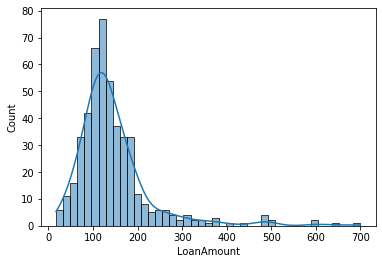

In [13]:
sns.histplot(data=loan_data, x='LoanAmount', kde=True)
print('Skewness: ',loan_data['LoanAmount'].skew())

Skewness:  -2.3068124031504924


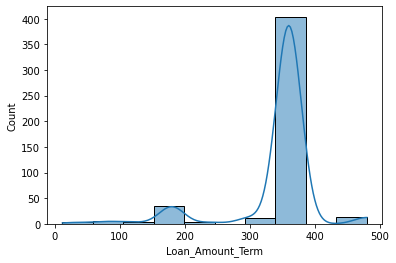

In [14]:
sns.histplot(data=loan_data, x='Loan_Amount_Term', kde=True)
print('Skewness: ',loan_data['Loan_Amount_Term'].skew())

In [15]:
loan_data['LoanAmount'].skew()
#kalo minus skewness kiri
#kalo positif skewness kanan
#kalo 0 distribusi normal

2.7954233031586915

## **Correlation**

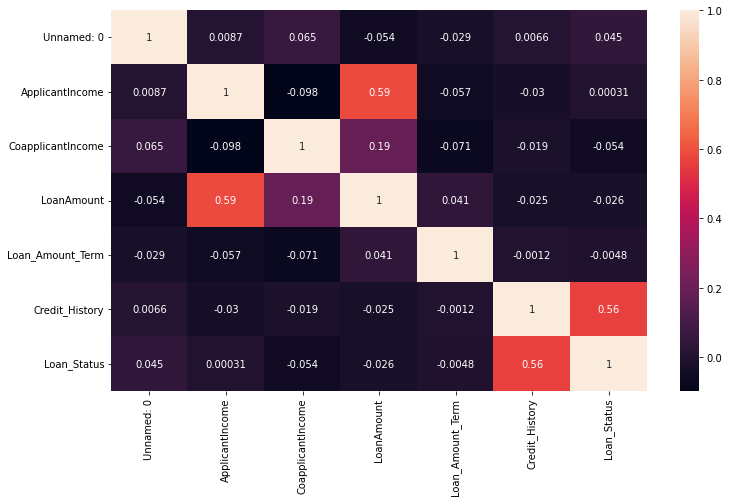

In [16]:
plt.figure(figsize=(12,7))
sns.heatmap(loan_data.corr(), annot=True)
plt.show()

## **Statistical Analysis**

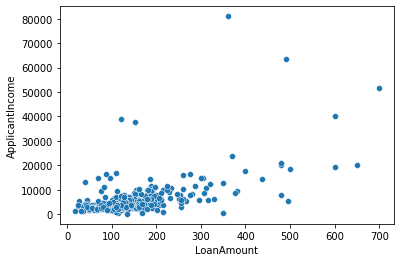

In [17]:
sns.scatterplot(data=loan_data, x='LoanAmount',y='ApplicantIncome')

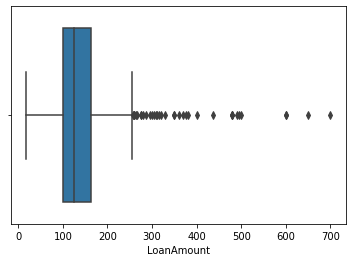

In [18]:
sns.boxplot(data=loan_data, x='LoanAmount')

##**Handling Outlier**

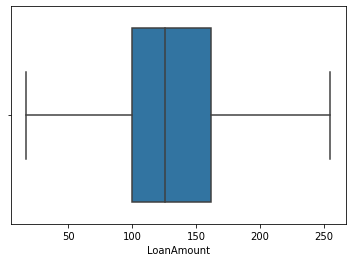

In [19]:
sns.boxplot(data=loan_data, x='LoanAmount', showfliers=False)

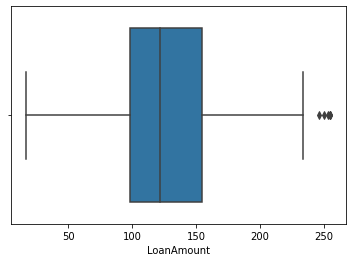

In [20]:
Q1 = loan_data['LoanAmount'].quantile(0.25)
Q3 = loan_data['LoanAmount'].quantile(0.75)

IQR = Q3-Q1
IQR
lower_whisker = Q1-1.5*(IQR)
higher_whisker = Q3+1.5*(IQR)

ex_out = loan_data[(loan_data['LoanAmount'] >= lower_whisker) & (loan_data['LoanAmount'] <= higher_whisker)]
sns.boxplot(data=ex_out,x='LoanAmount')
#ini udah rumusnya, jangan diotak atik lagi